## Notebook to help Decision Making selling calls

#### Stock prices download

#### Volatility checks 

#### Sharpe Ratio Check

#### Monte-Carlo call option pricing

#### Value at risk (VAR) & Conditional Value at risk (CVAR) by Historical and Monte Carlo Methode

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import random 

import plotly.offline as pyo
import plotly.graph_objects as go

pyo.init_notebook_mode(connected =True)
pd.options.plotting.backend = 'plotly'

In [2]:
## STOCKS LIST TO CHECK##

ibex = ['MAP.MC','ACS.MC','FER.MC','ACX.MC','GRF.MC','REE.MC','BBVA.MC','SAB.MC','BKT.MC','SGRE.MC','AMS.MC','FDR.MC','SAN.MC','TEF.MC','ENG.MC','PHM.MC','IBE.MC',
           'CABK.MC','MTS.MC','VIS.MC','NTGY.MC','ELE.MC','CLNX.MC','ANA.MC','MEL.MC','COL.MC','MRL.MC','ITX.MC','IAG.MC','AENA.MC']


In [3]:
# DOWNLOAD PRICE DATA 1 YEAR

raw_data = yf.download(ibex, period='1y') # ytd ,2y, 5y, 10y
raw_data.to_csv('stock_prices_MEF')

[*********************100%***********************]  30 of 30 completed


In [4]:
# IGNORE VOLUME AND TAKE ONLY ADJUSTED CLOSE PRICES
close_prices = raw_data['Adj Close']
close_prices.shape

(258, 30)

In [5]:
# Compute log returns for all stock prices 
log_returns = np.log(close_prices/close_prices.shift(1)).dropna()
log_returns.head()

,ACS.MC,ACX.MC,AENA.MC,AMS.MC,ANA.MC,BBVA.MC,BKT.MC,CABK.MC,CLNX.MC,COL.MC,...,MRL.MC,MTS.MC,NTGY.MC,PHM.MC,REE.MC,SAB.MC,SAN.MC,SGRE.MC,TEF.MC,VIS.MC
Date,,,,,,,,,,,,,,,,,,,,,
2021-08-12,0.004745,0.006969,0.000361,-0.004580,0.010257,-0.002713,-0.001644,-0.005674,0.008293,0.003214,...,0.012295,-0.008655,-0.000459,0.005162,0.001452,-0.005190,-0.006087,-0.009832,0.007621,-0.010695
2021-08-13,0.010274,0.023167,-0.006885,0.018947,0.003638,-0.004766,0.003696,0.004542,0.004121,0.011167,...,0.004876,0.012226,0.001836,0.002571,0.003767,-0.003257,-0.003670,0.010647,0.000700,0.001653
2021-08-16,-0.018917,-0.018404,-0.006933,-0.021629,0.002176,-0.007707,-0.007819,-0.013688,-0.004809,0.006326,...,0.005256,-0.020957,-0.001836,0.007957,0.001156,-0.016116,-0.019337,-0.000407,-0.006440,-0.004137
2021-08-17,-0.003478,-0.003028,-0.009566,-0.021323,0.002172,-0.024895,-0.009756,-0.015432,0.020788,-0.019635,...,-0.016671,-0.011984,0.000919,0.020174,-0.001735,-0.030637,-0.018445,-0.003674,-0.001058,-0.003322
2021-08-18,0.011261,0.007769,0.011030,-0.003533,0.019335,0.021277,0.025943,0.020778,0.008062,0.007475,...,0.012225,0.003343,0.001835,0.004428,0.006920,0.027981,0.004445,0.027830,0.011109,-0.005004


In [6]:
## COMPUTE ANUALIZED VOLATILITY FOR ALL STOCKS

daily_std = log_returns.std()
daily_std
annualized_vol = daily_std * np.sqrt(252)
annualized_vol*100 # returns % 

ACS.MC     25.600286
ACX.MC     35.769599
AENA.MC    29.831490
AMS.MC     33.880781
ANA.MC     28.431743
BBVA.MC    37.442857
BKT.MC     36.918661
CABK.MC    37.434935
CLNX.MC    31.581110
COL.MC     26.628847
ELE.MC     25.181348
ENG.MC     18.709344
FDR.MC     44.115227
FER.MC     27.058259
GRF.MC     43.087869
IAG.MC     51.311765
IBE.MC     26.547151
ITX.MC     31.995476
MAP.MC     24.512001
MEL.MC     42.235943
MRL.MC     28.605412
MTS.MC     45.833889
NTGY.MC    28.596488
PHM.MC     47.556241
REE.MC     20.834057
SAB.MC     47.822761
SAN.MC     35.870067
SGRE.MC    49.739080
TEF.MC     22.916638
VIS.MC     17.904537
dtype: float64

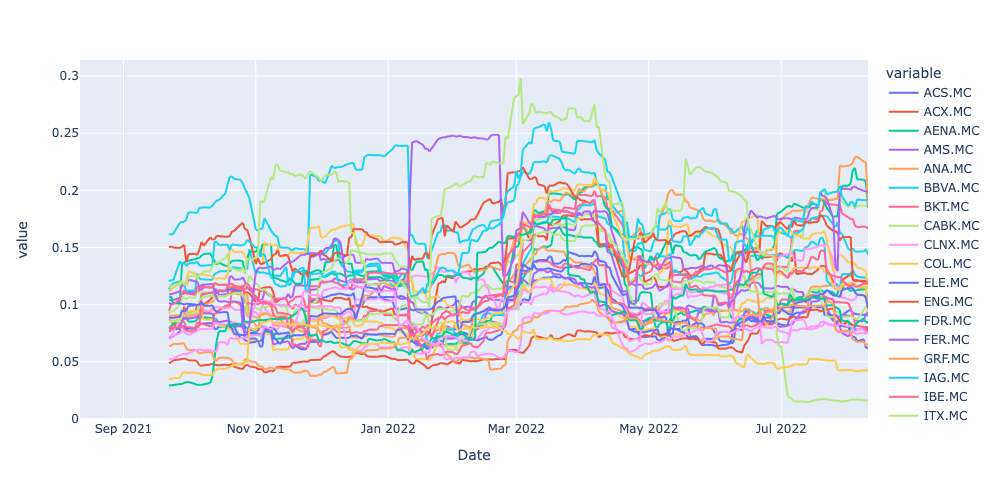

In [35]:
#TRAILING VOLATILITY OVER TIME
trade_days = 30
volatility = log_returns.rolling(window=trade_days).std()*np.sqrt(trade_days)
volatility.plot().update_layout(autosize=False, width = 1024, height = 500)

In [40]:
volatility.iloc[-1,:]*100   # 30 days volatility 

ACS.MC      9.013135
ACX.MC     12.275220
AENA.MC    10.278897
AMS.MC      7.851615
ANA.MC     11.580625
BBVA.MC    12.152215
BKT.MC     16.681356
CABK.MC    18.643401
CLNX.MC    10.317567
COL.MC      9.071602
ELE.MC      6.222036
ENG.MC      7.959854
FDR.MC     18.488488
FER.MC      9.235834
GRF.MC     18.704600
IAG.MC     14.386282
IBE.MC      7.663360
ITX.MC     10.008646
MAP.MC      7.601864
MEL.MC     11.389867
MRL.MC      9.643016
MTS.MC     11.827345
NTGY.MC     8.421159
PHM.MC     19.902601
REE.MC      6.586992
SAB.MC     19.139317
SAN.MC     12.011995
SGRE.MC     1.600091
TEF.MC      7.534197
VIS.MC      4.265718
Name: 2022-08-10 00:00:00, dtype: float64

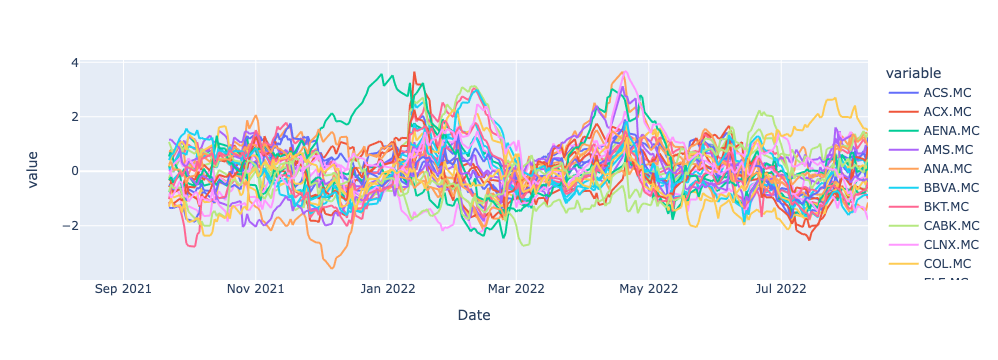

In [41]:
# SHARPE RATIO

# measure for calc risk-adj return. Avg return earned in excess of the risk free rate per unit of volatility

Rf = 0.01/252 # risk free rate 
sharpe_ratio = (log_returns.rolling(window=trade_days).mean() - Rf)*trade_days/volatility
sharpe_ratio.plot()

### MONTECARLO SIMULATION FOR PRICING AN EUROPEAN CALL OPTION

Brownian motion used is a risk-neutral variation added to the process.

Value option = risk-neutral discounted payoff expected

Result is random as it comes from an average of random generated data.

xt = ln(St)  (normally distributed)

In [11]:
import math
import scipy.stats as stats
import datetime as datetime

In [42]:
ticker = 'CABK.MC' # Choose ticker from list of tickers to perform call option pricing computation
expiration_date = datetime.date(2022,9,19)   #### Expiration DATE OF THE options (time base for all following computations)

S = close_prices[ticker][-1]    # stock price
K = 3.0                         # strike price
vol = annualized_vol[ticker]    # volatility (%)
r = 0.01                   # risk free rate
N = 10                          # N number of time steps
M = 100000                     # M number of simulations


T = ((expiration_date - datetime.date.today()).days+1)/365 # time in years

#### Vectorized implementation

In [43]:
dt = T/N
nudt = (r -0.5*vol**2)*dt   # drift
volsdt = vol*np.sqrt(dt)
lnS = np.log(S)

Z = np.random.normal(size=(N,M))
d_lnSt = nudt + volsdt*Z
lnSt = lnS + np.cumsum(d_lnSt, axis = 0)
lnSt = np.concatenate((np.full(shape=(1,M), fill_value=lnS), lnSt))
                      
ST = np.exp(lnSt)
CT = np.maximum(0,ST - K)
C0 = np.exp(-r*T)*np.sum(CT[-1])/M

sigma = np.sqrt(np.sum((CT[-1] - C0)**2)/(M-1))
SE = sigma/np.sqrt(M)

print("Call value is {} with SE +/- {} for stock {} at expiration date {}".format(np.round(C0,2),np.round(SE,2),ticker, expiration_date))

Call value is 0.16 with SE +/- 0.0 for stock CABK.MC at expiration date 2022-09-19


### VALUE AT RISK  & CONDITIONAL VALUE AT RISK

    Maximum loss in a given holding period with defined confidence level 

In [44]:
# 95% confidence level  
alpha = 5

# Historical data used to not make assumptions of distribution that the asset follows or use a Monte Carlo Simulation

##### Historical Data Method

In [45]:
ticker_price = close_prices[ticker]
ticker_returns = ticker_price.pct_change()

def hist_var(ticker_returns,alpha=5):
    if isinstance(ticker_returns, pd.Series):
        return np.nanpercentile(ticker_returns,5)
    elif isinstance(ticker_retudns, pd.DataFrame):
        return ticker_returns.aggregate(hist_var, alpha=5)
    else:
        raise TypeError("hulapalula not Series or DataFrame!!!")
    
print(hist_var(ticker_returns,alpha=5))
 
    

-0.03834970930811223


In [46]:
def hist_cvar(ticker_returns,alpha=5):
    if isinstance(ticker_returns, pd.Series):
        under_var = ticker_returns <= hist_var(ticker_returns,alpha=alpha)
        return ticker_returns[under_var].mean()
    elif isinstance(ticker_retudns, pd.DataFrame):
        return ticker_returns.aggregate(hist_cvar, alpha=5)
    else:
        raise TypeError("hulapalula not Series or DataFrame!!!")
        
print(hist_cvar(ticker_returns,alpha=5))

-0.05355672739919533


In [17]:
time = ((expiration_date - datetime.date.today()).days)
alpha = 5

var = hist_var(ticker_returns,alpha=alpha)*np.sqrt(time)
cvar = hist_cvar(ticker_returns,alpha=alpha)*np.sqrt(time)
expected_return = ticker_returns.mean()*np.sqrt(time)

investment = ticker_price[-1]*100

print("Investment = {} ".format(investment))
print("Value at risk 95% confidence level is {}".format(var*investment))
print("Conditional value at risk with 95% Confidence level is {}".format(cvar*investment))
print("Expected return is {}".format(expected_return*investment))

Investment = 302.60000228881836 
Value at risk 95% confidence level is -72.47084193911196
Conditional value at risk with 95% Confidence level is -101.20809769220774
Expected return is 1.8447843950581069


#### Monte Carlo simulation

    - Portfolio simulation
    - Value at risk and conditional value at risk

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

[*********************100%***********************]  2 of 2 completed


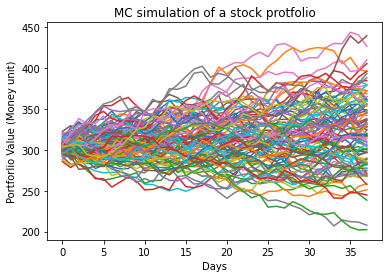

321.9728625587355
45.926256770194456
MC average share price by expiration date = 2022-09-19 is 3.22/share
VAR 45.4 at expiration date 2022-09-19
CVAR 73.69 at expiration date 2022-09-19


In [47]:
# download price data function
ticker = ['CABK.MC','GME']  # portfolio tickers

#weights = np.random.random(len(mean_returns)) # random weigths for each one of the stocks that compose the portfolio
weights = np.array([1,0])
nweights =  weights/np.sum(weights)  # sum of weights equals to 1  (normalize)

def get_prices(stocks,period):
    """
    Download stock or list of stocks price data for a given period of time from yahoo finance
    stocks: ticker string or list of tickers string:
                'GME' or ['GME','BBBY']
    period: yfinance period time strings like  ytd, 1y ,2y, 5y, 10y
    """
    price_data = yf.download(stocks,period=period)
    return price_data

def get_adjClose(price_df):
    close_prices = price_df['Adj Close']
    returns = close_prices.pct_change()
    mean_returns = returns.mean()
    cov_matrix = returns.cov()
    return close_prices,mean_returns, cov_matrix

nSims = 100 # number of simulations
timeFrame = (expiration_date - datetime.date.today()).days

stock_data, mean_returns, cov_matrix = get_adjClose(get_prices(ticker,'1y'))

meanM = np.full(shape=(timeFrame,len(mean_returns)),fill_value = mean_returns)
meanM = meanM.T

portfolio_sims = np.full(shape=(timeFrame,nSims),fill_value=0.0)

for m in range (0,nSims):
    #cholesky Decomposition
    Z = np.random.normal(size=(timeFrame,len(mean_returns)))
    L = np.linalg.cholesky(cov_matrix)
    dailyReturns =    meanM + np.inner(L,Z)  # dot product
    portfolio_sims[:,m] = np.cumprod(np.inner(nweights,dailyReturns.T)+1)*investment 
                         
plt.plot(portfolio_sims)
plt.ylabel('Portforlio Value (Money unit)')
plt.xlabel('Days')
plt.title('MC simulation of a stock protfolio')
plt.show()
       
last_day_sim = portfolio_sims[-1,:]
print(last_day_sim.mean())
print(last_day_sim.std())

print("MC average share price by expiration date = {} is {}/share".format(expiration_date,round(last_day_sim.mean()/100,2))) # divide by 100 becouse portfolio is equal to 100 shares of one stock

def monteCarloVar(returns, alpha=5):
    """
    Input: pandas series of returns
    Output: percentile return distribution to assigned alpha)
    """
    if isinstance(returns, pd.Series):
        return np.percentile(returns,alpha)
    else:
        raise TypeError("Expected pandas data series")
        
def monteCarloCVar(returns, alpha=5):
    """
    Input: pandas series of returns
    Output: Cvar to assigned alpha)
    """
    if isinstance(returns, pd.Series):
        under_var = returns <= monteCarloVar(returns, alpha=alpha)
        return returns[under_var].mean()
    else:
        raise TypeError("Expected pandas data series")
        

finalResult = pd.Series(portfolio_sims[-1,:])


var= investment-monteCarloVar(finalResult,alpha=5)
Cvar = investment-monteCarloCVar(finalResult,alpha=5)

print('VAR {} at expiration date {}'.format(round(var,2),expiration_date))
print('CVAR {} at expiration date {}'.format(round(Cvar,2),expiration_date))

